## Telecom Churn Case Study

In the telecom industry, customers are able to choose from multiple service providers and actively switch from one operator to another. In this highly competitive market, the telecommunications industry experiences an average of 15-25% annual churn rate. Given the fact that it costs 5-10 times more to acquire a new customer than to retain an existing one, customer retention has now become even more important than customer acquisition.

 

For many incumbent operators, retaining high profitable customers is the number one business goal.

 

To reduce customer churn, telecom companies need to predict which customers are at high risk of churn.

## Objective 

The objective of this project is to analyze customer-level data from a prominent telecom company, develop predictive models to detect high-risk churn customers, and determine the primary indicators of churn.

### Importing required libraries

In [1]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA, IncrementalPCA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

### Importing Data

In [2]:
# Importing dataset
df = pd.read_csv("telecom_churn_data.csv")

In [3]:
df.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,...,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,...,0,1.0,1.0,1.0,NaN,968,30.4,0.0,101.20,3.58
1,7001865778,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,34.047,...,0,NaN,1.0,1.0,NaN,1006,0.0,0.0,0.00,0.00
2,7001625959,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,167.690,...,0,NaN,NaN,NaN,1.0,1103,0.0,0.0,4.17,0.00
3,7001204172,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,221.338,...,0,NaN,NaN,NaN,NaN,2491,0.0,0.0,0.00,0.00
4,7000142493,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,261.636,...,0,0.0,NaN,NaN,NaN,1526,0.0,0.0,0.00,0.00


In [4]:
df.shape

(99999, 226)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 226 entries, mobile_number to sep_vbc_3g
dtypes: float64(179), int64(35), object(12)
memory usage: 172.4+ MB


In [6]:
df.describe()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,...,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
count,9.999900e+04,99999.0,98981.0,98981.0,98981.0,99999.000000,99999.000000,99999.000000,99999.000000,96062.000000,...,99999.000000,25153.000000,25571.000000,26339.000000,25922.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000
mean,7.001207e+09,109.0,0.0,0.0,0.0,282.987358,278.536648,279.154731,261.645069,132.395875,...,0.084581,0.914404,0.908764,0.890808,0.860968,1219.854749,68.170248,66.839062,60.021204,3.299373
std,6.956694e+05,0.0,0.0,0.0,0.0,328.439770,338.156291,344.474791,341.998630,297.207406,...,0.650457,0.279772,0.287950,0.311885,0.345987,954.733842,267.580450,271.201856,253.938223,32.408353
min,7.000000e+09,109.0,0.0,0.0,0.0,-2258.709000,-2014.045000,-945.808000,-1899.505000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,180.000000,0.000000,0.000000,0.000000,0.000000
25%,7.000606e+09,109.0,0.0,0.0,0.0,93.411500,86.980500,84.126000,62.685000,7.380000,...,0.000000,1.000000,1.000000,1.000000,1.000000,467.000000,0.000000,0.000000,0.000000,0.000000
50%,7.001205e+09,109.0,0.0,0.0,0.0,197.704000,191.640000,192.080000,176.849000,34.310000,...,0.000000,1.000000,1.000000,1.000000,1.000000,863.000000,0.000000,0.000000,0.000000,0.000000
75%,7.001812e+09,109.0,0.0,0.0,0.0,371.060000,365.344500,369.370500,353.466500,118.740000,...,0.000000,1.000000,1.000000,1.000000,1.000000,1807.500000,0.000000,0.000000,0.000000,0.000000
max,7.002411e+09,109.0,0.0,0.0,0.0,27731.088000,35145.834000,33543.624000,38805.617000,7376.710000,...,49.000000,1.000000,1.000000,1.000000,1.000000,4337.000000,12916.220000,9165.600000,11166.210000,2618.570000


####  In churn prediction, assuming three distinct phases of customer lifecycle:

- The ‘good’ phase [Month 6 & 7]
- The ‘action’ phase [Month 8]
- The ‘churn’ phase [Month 9]
- Given that our analysis spans four months, the initial two months constitute the ‘good’ phase, the subsequent month denotes the ‘action’ phase, and the final month signifies the ‘churn’ phase.

### 1. Deriving the new features

In [7]:
# let's extract the columns that contain recharge amounts.
rech_columns =  df.columns[df.columns.str.contains('rech_amt|rech_data')]
print(rech_columns)

Index(['total_rech_amt_6', 'total_rech_amt_7', 'total_rech_amt_8',
       'total_rech_amt_9', 'max_rech_amt_6', 'max_rech_amt_7',
       'max_rech_amt_8', 'max_rech_amt_9', 'date_of_last_rech_data_6',
       'date_of_last_rech_data_7', 'date_of_last_rech_data_8',
       'date_of_last_rech_data_9', 'total_rech_data_6', 'total_rech_data_7',
       'total_rech_data_8', 'total_rech_data_9', 'max_rech_data_6',
       'max_rech_data_7', 'max_rech_data_8', 'max_rech_data_9',
       'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8',
       'av_rech_amt_data_9'],
      dtype='object')


#### Based on the aforementioned features, we can derive more valuable insights, such as:

- The total amount recharged by the customer
- The total amount of data recharged by the customer
- The highest recharge amount made by the customer
- The last date when the customer recharged data
- The average amount recharged for data by the customer.

In [8]:
# Checking null values percentages

df_null_values = 100*df.loc[:,rech_columns].isnull().sum()/len(df)
df1 = pd.DataFrame(df_null_values)
df1.rename(columns={0:'Null_Perc'}, inplace=True)
display(df1)

,Null_Perc
total_rech_amt_6,0.000000
total_rech_amt_7,0.000000
total_rech_amt_8,0.000000
total_rech_amt_9,0.000000
max_rech_amt_6,0.000000
max_rech_amt_7,0.000000
max_rech_amt_8,0.000000
max_rech_amt_9,0.000000
date_of_last_rech_data_6,74.846748
date_of_last_rech_data_7,74.428744


#### Above result shows that more than `74%` values for `recharge` related data are missing. 

In [9]:
df.loc[:,rech_columns].describe()

,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9
count,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,25153.000000,25571.000000,26339.000000,25922.000000,25153.000000,25571.000000,26339.000000,25922.00000,25153.000000,25571.000000,26339.000000,25922.000000
mean,327.514615,322.962970,324.157122,303.345673,104.637486,104.752398,107.728207,101.943889,2.463802,2.666419,2.651999,2.441170,126.393392,126.729459,125.717301,124.94144,192.600982,200.981292,197.526489,192.734315
std,398.019701,408.114237,416.540455,404.588583,120.614894,124.523970,126.902505,125.375109,2.789128,3.031593,3.074987,2.516339,108.477235,109.765267,109.437851,111.36376,192.646318,196.791224,191.301305,188.400286
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,0.500000,0.500000,1.000000
25%,109.000000,100.000000,90.000000,52.000000,30.000000,30.000000,30.000000,28.000000,1.000000,1.000000,1.000000,1.000000,25.000000,25.000000,25.000000,25.00000,82.000000,92.000000,87.000000,69.000000
50%,230.000000,220.000000,225.000000,200.000000,110.000000,110.000000,98.000000,61.000000,1.000000,1.000000,1.000000,2.000000,145.000000,145.000000,145.000000,145.00000,154.000000,154.000000,154.000000,164.000000
75%,437.500000,428.000000,434.500000,415.000000,120.000000,128.000000,144.000000,144.000000,3.000000,3.000000,3.000000,3.000000,177.000000,177.000000,179.000000,179.00000,252.000000,252.000000,252.000000,252.000000
max,35190.000000,40335.000000,45320.000000,37235.000000,4010.000000,4010.000000,4449.000000,3399.000000,61.000000,54.000000,60.000000,84.000000,1555.000000,1555.000000,1555.000000,1555.00000,7546.000000,4365.000000,4076.000000,4061.000000


- To capture the amount utilized by customers for data, we can derive a new feature called "total_rech_amt_data" by adding "total_rech_data" and "av_rech_amt_data".
- Since the minimum value in the data is 1, we can impute the missing values with 0, assuming that the customer did not perform any recharges during that period.

In [10]:
df['total_rech_data_6'] = df['total_rech_data_6'].replace(np.NaN,0.0)
df['total_rech_data_7'] = df['total_rech_data_7'].replace(np.NaN,0.0)
df['total_rech_data_8'] = df['total_rech_data_8'].replace(np.NaN,0.0)

In [11]:
df['av_rech_amt_data_6'] = df['av_rech_amt_data_6'].replace(np.NaN,0.0)
df['av_rech_amt_data_7'] = df['av_rech_amt_data_7'].replace(np.NaN,0.0)
df['av_rech_amt_data_8'] = df['av_rech_amt_data_8'].replace(np.NaN,0.0)

- To determine High Value Customers, we can create a new column called "Total Recharge Amount for Data" by multiplying the "Avg Recharge Amount" with "Total Recharge Data". 

- This will give us the total amount recharged by the customer for data, which can be used as an indicator for identifying high value customers.

In [12]:
#Total Recharge Amount for data

df['total_rech_amt_data_6'] = df.av_rech_amt_data_6 * df.total_rech_data_6
df['total_rech_amt_data_7'] = df.av_rech_amt_data_7 * df.total_rech_data_7
df['total_rech_amt_data_8'] = df.av_rech_amt_data_8 * df.total_rech_data_8

- Defining avg. recharge amount for good phase (6 & 7).

In [13]:
df['total_avg_rech_amnt_6_7_GPhase'] = (df.total_rech_amt_6 + df.total_rech_amt_data_6
                                             + df.total_rech_amt_7+ df.total_rech_amt_data_7)/2

### 2. Filtering high-value customers 

**High-value customers-**

High-value customers are those who have recharged with an amount equal to or greater than X. X is a value that is larger than 70% of the average recharge amount during the first two months (known as the good phase).

In [14]:
# Create a filter for values greater than the 70th percentile of the total average recharge amount during the good phase.
high_val_filter = df.total_avg_rech_amnt_6_7_GPhase.quantile(0.7)

print('70 percentile of 6th and 7th months avg recharge amount: '+str(high_val_filter))

df_high_val_cust = df[df.total_avg_rech_amnt_6_7_GPhase > high_val_filter]
print('Dataframe Shape after Filtering High Value Customers: ' + str(df_high_val_cust.shape))

70 percentile of 6th and 7th months avg recharge amount: 478.0
Dataframe Shape after Filtering High Value Customers: (29953, 230)


In [15]:
df_high_val_cust.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,...,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,total_rech_amt_data_6,total_rech_amt_data_7,total_rech_amt_data_8,total_avg_rech_amnt_6_7_GPhase
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,...,NaN,968,30.40,0.00,101.20,3.58,252.0,252.0,252.0,559.0
7,7000701601,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,1069.180,...,NaN,802,57.74,19.38,18.74,0.00,0.0,0.0,0.0,1185.0
8,7001524846,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,378.721,...,NaN,315,21.03,910.65,122.16,0.00,0.0,354.0,207.0,696.0
21,7002124215,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,514.453,...,NaN,720,0.00,0.00,0.00,0.00,0.0,0.0,0.0,640.0
23,7000887461,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,74.350,...,1.0,604,40.45,51.86,0.00,0.00,0.0,712.0,540.0,583.0


### 3. Tag churners and remove churn phase attributes.

Tag churners based on fourth month by identifying customers who have not made any incoming or outgoing calls, and have not used mobile internet during the churn phase. Assign churn=1 to these customers, and 0 otherwise. 

Use the following attributes to tag churners: 
- total_ic_mou_9
- total_og_mou_9
- vol_2g_mb_9
- vol_3g_mb_9

In [16]:
high_val_cust_9 = ['total_ic_mou_9', 'total_og_mou_9', 'vol_2g_mb_9','vol_3g_mb_9']

In [17]:
# Checking if NA/Null values are present or not

df2 = 100*df_high_val_cust.loc[:,high_val_cust_9].isnull().sum()/len(df_high_val_cust)
df2 = pd.DataFrame(df2)
df2.rename(columns={0:'Null_Percentage'}, inplace=True)
print(df2)

                Null_Percentage
total_ic_mou_9              0.0
total_og_mou_9              0.0
vol_2g_mb_9                 0.0
vol_3g_mb_9                 0.0


In [18]:
# Initially set all values as 0

df_high_val_cust['churn']= 0

In [19]:
#Create a boolean flag 'is_churned' for customers with zero values in the above mentioned attributes.
is_churned = (df_high_val_cust.total_ic_mou_9 == 0) & \
             (df_high_val_cust.total_og_mou_9 == 0) & \
             (df_high_val_cust.vol_2g_mb_9 ==0) & \
             (df_high_val_cust.vol_3g_mb_9 ==0)

In [20]:
# Set all customers with the is_churned condition as True to 1.
df_high_val_cust.loc[is_churned,'churn']=1

In [21]:
df_high_val_cust.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,...,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,total_rech_amt_data_6,total_rech_amt_data_7,total_rech_amt_data_8,total_avg_rech_amnt_6_7_GPhase,churn
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,...,968,30.40,0.00,101.20,3.58,252.0,252.0,252.0,559.0,1
7,7000701601,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,1069.180,...,802,57.74,19.38,18.74,0.00,0.0,0.0,0.0,1185.0,1
8,7001524846,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,378.721,...,315,21.03,910.65,122.16,0.00,0.0,354.0,207.0,696.0,0
21,7002124215,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,514.453,...,720,0.00,0.00,0.00,0.00,0.0,0.0,0.0,640.0,0
23,7000887461,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,74.350,...,604,40.45,51.86,0.00,0.00,0.0,712.0,540.0,583.0,0


In [22]:
# Let's calculate the percentage of churned customers.
100*df_high_val_cust.churn.sum()/len(df_high_val_cust)

8.122725603445398

#### Remove churn phase attributes (i.e., those containing '_9') after tagging churners.

In [23]:
churn_month=  df_high_val_cust.columns[df_high_val_cust.columns.str.contains('_9')]

In [24]:
# drop all columns corresponding to the churn phase
df_high_val_cust.drop(churn_month,axis=1,inplace=True)

In [25]:
df_high_val_cust.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,...,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,total_rech_amt_data_6,total_rech_amt_data_7,total_rech_amt_data_8,total_avg_rech_amnt_6_7_GPhase,churn
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,197.385,214.816,...,968,30.40,0.00,101.20,3.58,252.0,252.0,252.0,559.0,1
7,7000701601,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,1069.180,1349.850,...,802,57.74,19.38,18.74,0.00,0.0,0.0,0.0,1185.0,1
8,7001524846,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,378.721,492.223,...,315,21.03,910.65,122.16,0.00,0.0,354.0,207.0,696.0,0
21,7002124215,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,514.453,597.753,...,720,0.00,0.00,0.00,0.00,0.0,0.0,0.0,640.0,0
23,7000887461,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,74.350,193.897,...,604,40.45,51.86,0.00,0.00,0.0,712.0,540.0,583.0,0


## Data Cleaning and EDA

####  Drop data with only one unique value.

In [26]:
# Identify columns with a single unique value
col = df_high_val_cust.loc[:,df_high_val_cust.apply(pd.Series.nunique) == 1]
col.head(5)

,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8
0,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,NaN,NaN,0.0,NaN,NaN,0.0
7,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,0.0,0.0,0.0,0.0,0.0,0.0
8,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,0.0,0.0,0.0,0.0,0.0,0.0
21,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,0.0,0.0,0.0,0.0,0.0,0.0
23,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,0.0,0.0,0.0,0.0,0.0,0.0


- The following features have only one unique value and will be dropped as they do not provide any value to our model building and analysis.

In [27]:
df_high_val_cust = df_high_val_cust.loc[:,df_high_val_cust.apply(pd.Series.nunique) != 1]
df_high_val_cust.shape

(29953, 164)

#### Identify columns that can be converted to integers, floats, or other data types.

In [28]:
obj_col= df_high_val_cust.select_dtypes(include=['object'])
print(obj_col.iloc[0])

date_of_last_rech_6         6/21/2014
date_of_last_rech_7         7/16/2014
date_of_last_rech_8          8/8/2014
date_of_last_rech_data_6    6/21/2014
date_of_last_rech_data_7    7/16/2014
date_of_last_rech_data_8     8/8/2014
Name: 0, dtype: object


In [29]:
# convert to datetime
for col in obj_col.columns:
    df_high_val_cust[col] = pd.to_datetime(df_high_val_cust[col])

df_high_val_cust.shape

(29953, 164)

#### Conduct exploratory analysis to extract insights that may be directly useful for business or for eventual modeling/feature engineering.

In [30]:
# create box plot for  6th, 7th and 8th month
def plot_box_chart(attribute):
    plt.figure(figsize=(20,16))
    df_new= df_high_val_cust
    plt.subplot(2,3,1)
    sns.boxplot(data=df_new, y=attribute+"_7",x="churn",hue="churn",
                showfliers=False,palette=("cool"))
   
    plt.subplot(2,3,2)
    sns.boxplot(data=df_new, y=attribute+"_6",x="churn",hue="churn",
                showfliers=False,palette=("cool"))
    plt.subplot(2,3,3)
    sns.boxplot(data=df_new, y=attribute+"_8",x="churn",hue="churn",
                showfliers=False,palette=("cool"))
    plt.show()

#### 1. Recharge amount related variables

In [31]:
rech_columns =  df_high_val_cust.columns[df_high_val_cust.columns.str.contains('rech_amt')]
rech_columns.tolist()

['total_rech_amt_6',
 'total_rech_amt_7',
 'total_rech_amt_8',
 'max_rech_amt_6',
 'max_rech_amt_7',
 'max_rech_amt_8',
 'av_rech_amt_data_6',
 'av_rech_amt_data_7',
 'av_rech_amt_data_8',
 'total_rech_amt_data_6',
 'total_rech_amt_data_7',
 'total_rech_amt_data_8']

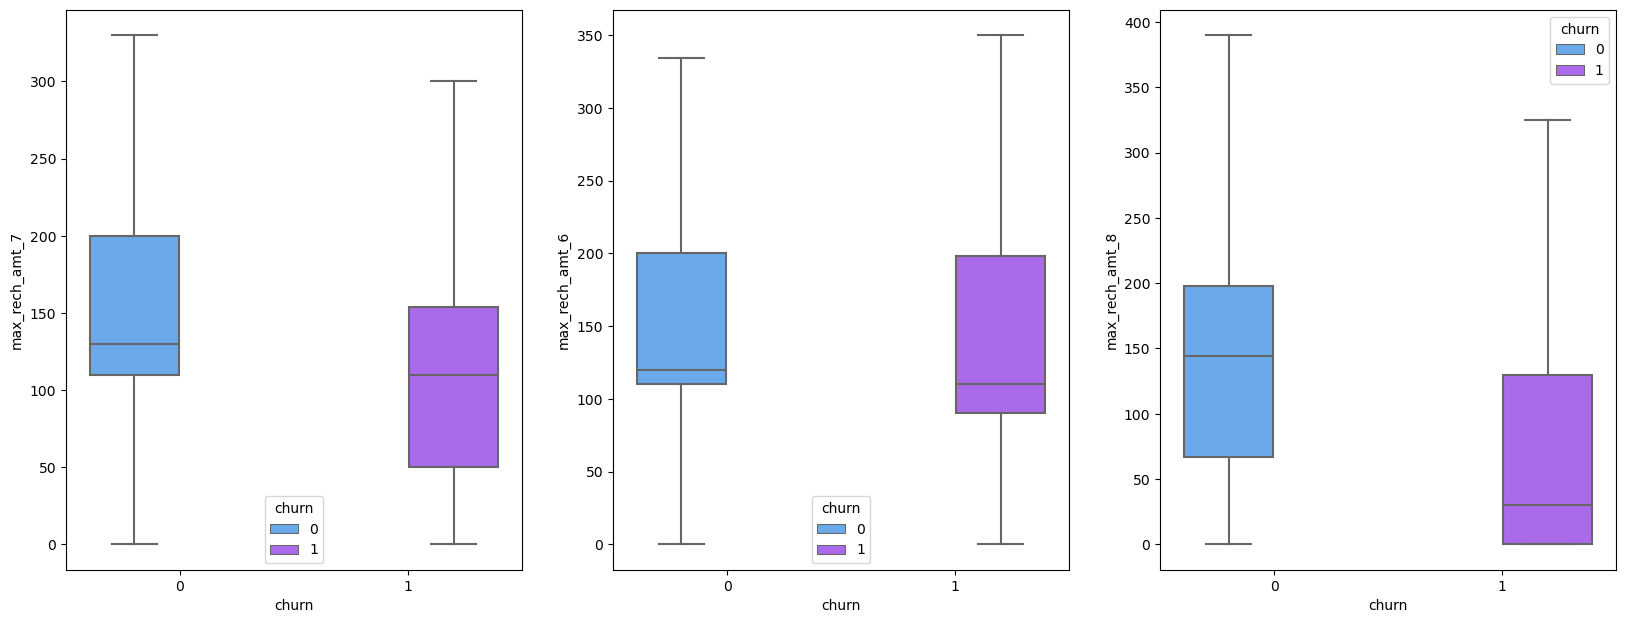

In [32]:
# Ploting for maximum recharge amount for data:
plot_box_chart('max_rech_amt')

- The maximum recharge amount for data in the 8th month (action phase) shows a significant drop for churned customers.

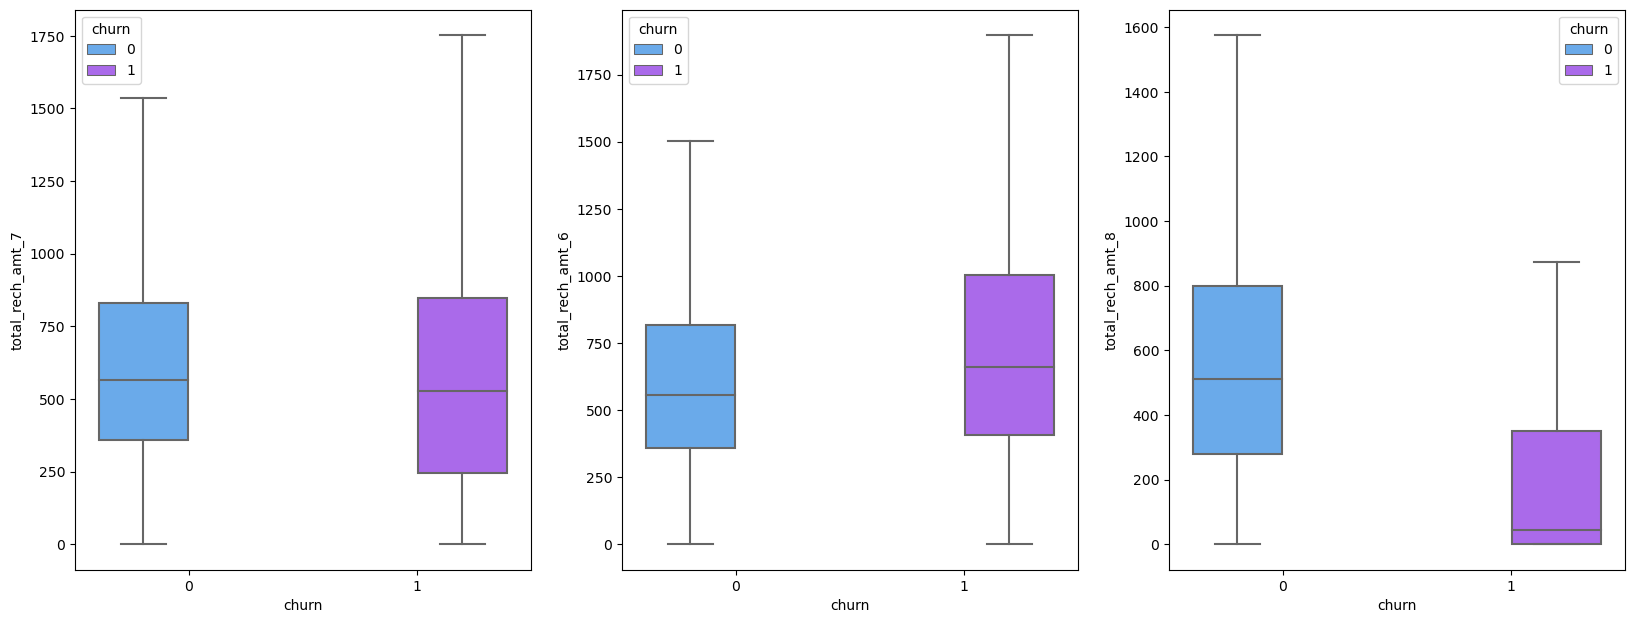

In [33]:
# Ploting for total recharge amount:
plot_box_chart('total_rech_amt')

- For churned customers, there is a noticeable decrease in the total recharge amount in the 8th month (Action Phase).

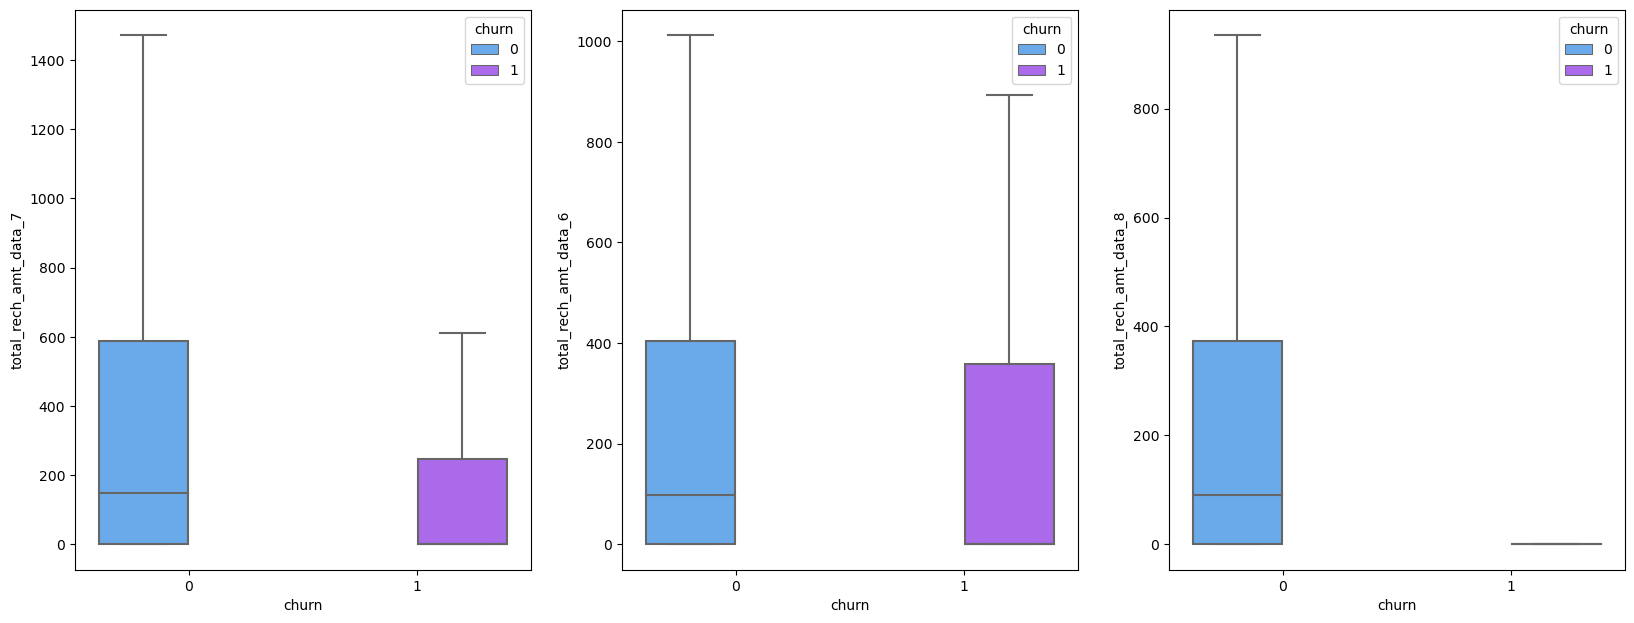

In [34]:
# Ploting for total recharge amount for data:
plot_box_chart('total_rech_amt_data')

- The total recharge amount for data in the 8th month (action phase) shows a significant decline for churned customers.

In [35]:
# Let's examine other variables related to recharge:
other_rech = df_high_val_cust.columns[df_high_val_cust.columns.str.contains('rech_num|max_rech_data',regex=True)]

In [36]:
# lets check the percentage of missing values for other variables related to recharge
100*df_high_val_cust.loc[:,other_rech].isnull().sum()/len(df_high_val_cust)

total_rech_num_6     0.000000
total_rech_num_7     0.000000
total_rech_num_8     0.000000
max_rech_data_6     44.112443
max_rech_data_7     43.117551
max_rech_data_8     46.799987
dtype: float64

In [37]:
df_high_val_cust.loc[:,['max_rech_data_6','max_rech_data_7','max_rech_data_8']].describe()

,max_rech_data_6,max_rech_data_7,max_rech_data_8
count,16740.000000,17038.000000,15935.000000
mean,139.804002,140.444712,136.353373
std,118.892926,120.295284,119.571138
min,1.000000,1.000000,1.000000
25%,25.000000,25.000000,25.000000
50%,152.000000,152.000000,152.000000
75%,198.000000,198.000000,198.000000
max,1555.000000,1555.000000,1555.000000


- The range of values for the recharge related variables is from 1 to 1555, indicating that missing values correspond to periods where no recharges took place. It is reasonable to fill these missing values with 0, indicating no recharge.

In [38]:
df_high_val_cust.loc[:,['max_rech_data_6','max_rech_data_7','max_rech_data_8']] \
= df_high_val_cust.loc[:,['max_rech_data_6','max_rech_data_7','max_rech_data_8']].replace(np.nan,0)

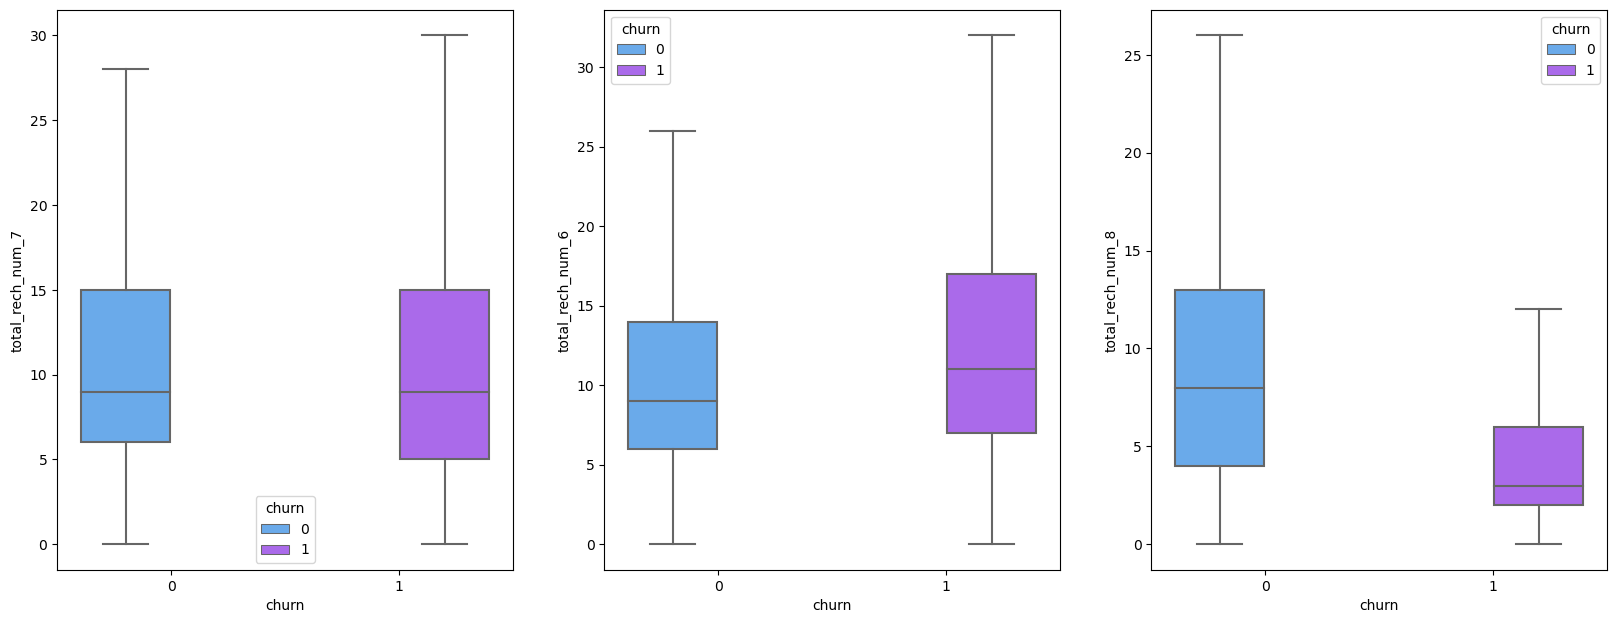

In [39]:
# Ploting for Total recharge for Number:
plot_box_chart('total_rech_num')

- During the exploratory analysis, it was observed that churned customers had a significant decrease in the total number of recharges made in the 8th month (action phase) compared to non-churned customers. This finding could be indicative of a potential correlation between low recharge activity and customer churn, which could be further investigated for modeling and feature engineering purposes.

#### 2.  Attributes related to 2G and 3G usage

In [40]:
# check monthly 2G/3G service schemes
month_subcr_2g_3g = df_high_val_cust.columns[df_high_val_cust.columns.str.contains('monthly_2g|monthly_3g',regex=True)]
month_subcr_2g_3g.tolist()

['monthly_2g_6',
 'monthly_2g_7',
 'monthly_2g_8',
 'monthly_3g_6',
 'monthly_3g_7',
 'monthly_3g_8']

In [41]:
#Check the missing value
100*df_high_val_cust.loc[:,month_subcr_2g_3g].isnull().sum()/len(df_high_val_cust.loc[:,month_subcr_2g_3g])

monthly_2g_6    0.0
monthly_2g_7    0.0
monthly_2g_8    0.0
monthly_3g_6    0.0
monthly_3g_7    0.0
monthly_3g_8    0.0
dtype: float64

#### 3. Minutes of usage - voice calls

In [42]:
mou = df_high_val_cust.columns[df_high_val_cust.columns.str.contains('mou')]

In [43]:
#Check the  missing value
100*df_high_val_cust.loc[:,mou].isnull().sum()/len(df_high_val_cust.loc[:,mou])

onnet_mou_6     1.809502
onnet_mou_7     1.789470
onnet_mou_8     3.912797
offnet_mou_6    1.809502
offnet_mou_7    1.789470
                  ...   
spl_ic_mou_7    1.789470
spl_ic_mou_8    3.912797
isd_ic_mou_6    1.809502
isd_ic_mou_7    1.789470
isd_ic_mou_8    3.912797
Length: 81, dtype: float64

- The maximum missing percentage for all "minutes of usage" columns is 3.91. This means that in these cases, the customer has not used that particular call type at all. Therefore, we can fill the missing values with zero.

In [44]:
# We can replace the null values with 0 for the minutes of usage variables.
df_high_val_cust.loc[:,mou] = df_high_val_cust.loc[:,mou].replace(np.NaN,0)

In [45]:
mou_og= df_high_val_cust.columns[df_high_val_cust.columns.str.contains('.*_og_.*mou_6',regex=True)]

In [46]:
df_high_val_cust.loc[:,mou_og].describe()

,roam_og_mou_6,loc_og_t2t_mou_6,loc_og_t2m_mou_6,loc_og_t2f_mou_6,loc_og_t2c_mou_6,loc_og_mou_6,std_og_t2t_mou_6,std_og_t2m_mou_6,std_og_t2f_mou_6,std_og_mou_6,isd_og_mou_6,spl_og_mou_6,total_og_mou_6
count,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000
mean,26.596033,84.574122,163.309546,6.348347,1.577380,254.240239,165.897941,179.439168,1.806292,347.147123,2.174995,5.825077,610.058005
std,116.274169,228.962993,250.218928,22.139546,6.308138,378.546516,403.990737,409.143255,11.988810,608.845412,45.888834,17.579228,691.178402
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,4.380000,19.210000,0.000000,0.000000,32.260000,0.000000,0.000000,0.000000,0.400000,0.000000,0.000000,116.640000
50%,0.000000,24.360000,77.260000,0.000000,0.000000,124.590000,2.710000,16.360000,0.000000,45.080000,0.000000,0.230000,410.630000
75%,0.000000,78.060000,209.030000,4.230000,0.000000,332.310000,109.560000,154.540000,0.000000,465.290000,0.000000,5.210000,859.030000
max,3775.110000,6431.330000,4729.740000,1466.030000,271.440000,10643.380000,7366.580000,8314.760000,628.560000,8432.990000,5900.660000,1023.210000,10674.030000


### Heat Map Plotting 

In [47]:
def heatmap(x,y,dataframe):
    plt.figure(figsize=(x,y))
    sns.heatmap(dataframe.corr(),cmap="coolwarm",annot=True)
    plt.show()

#### Check the outgoing mou variables 

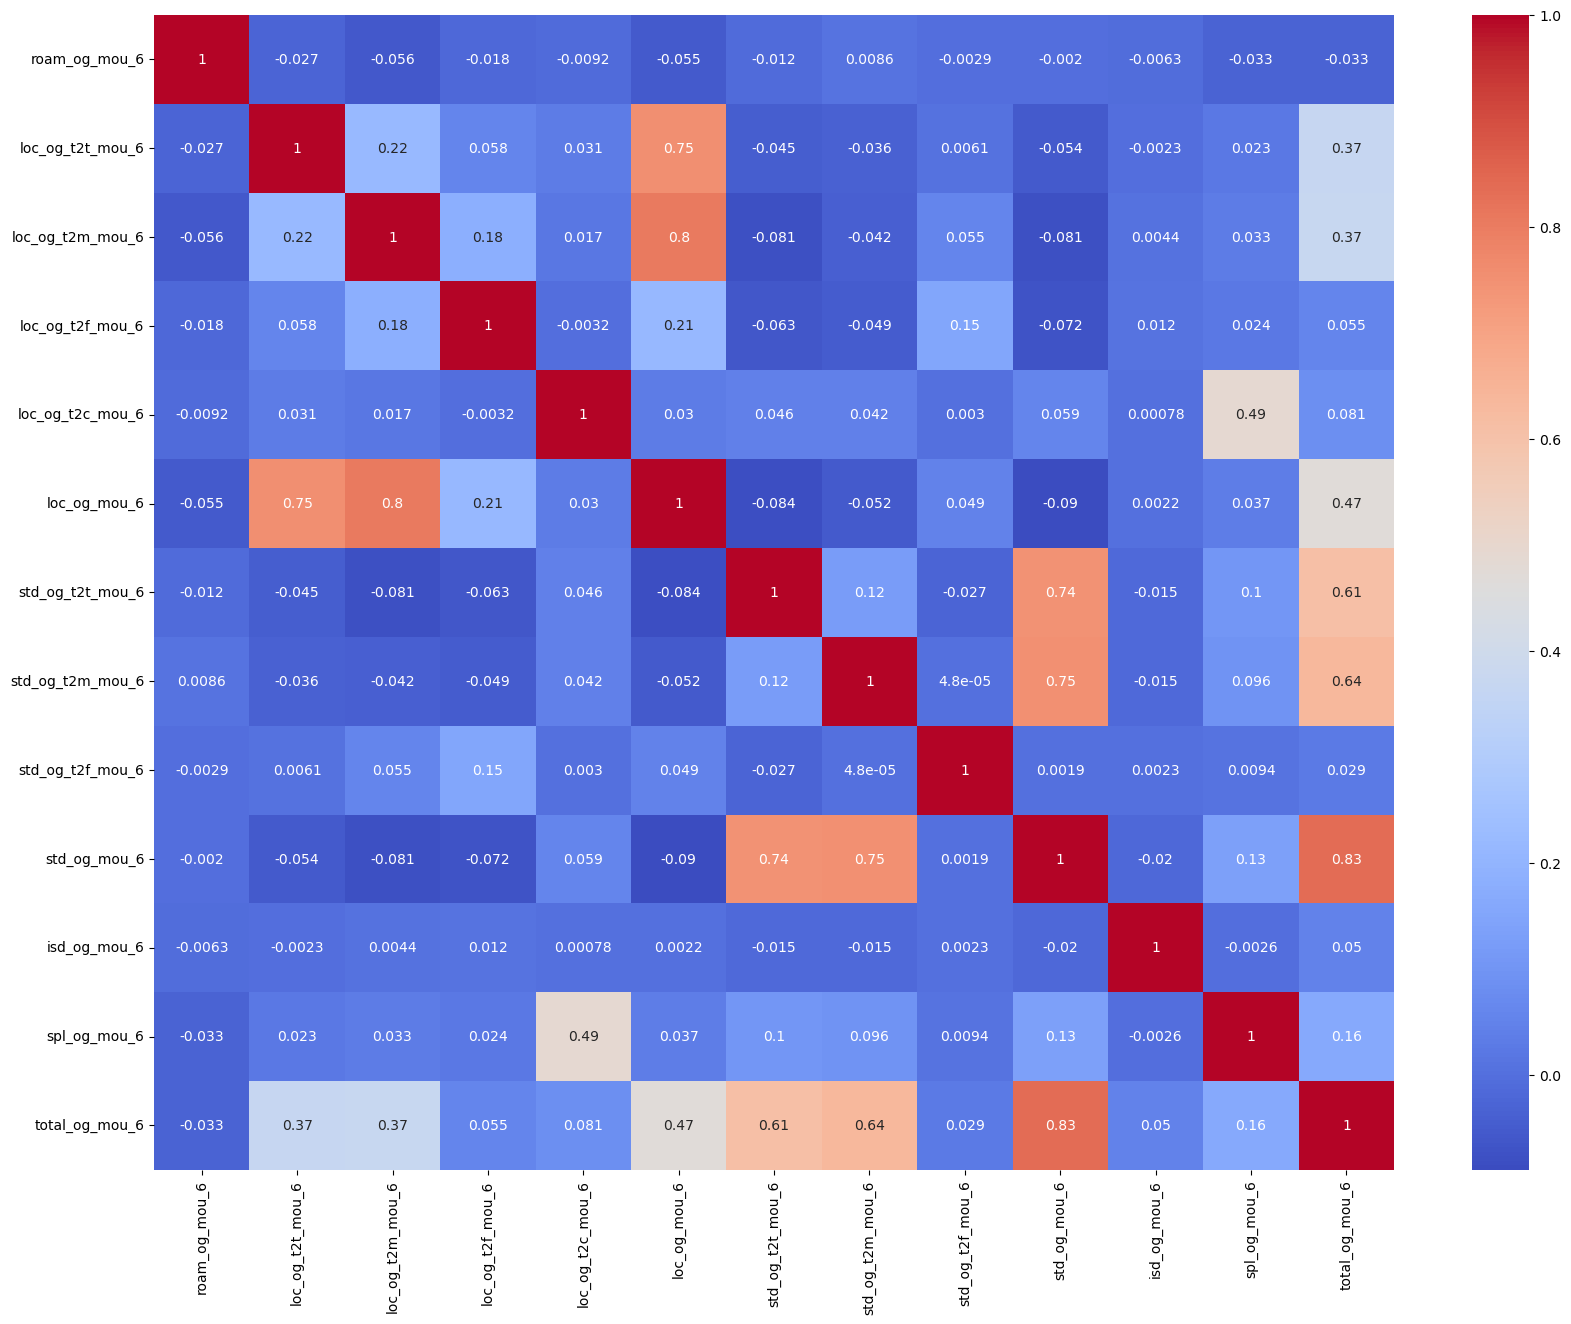

In [48]:
heatmap(20,15,df_high_val_cust.filter(mou_og))

In [49]:
#Drop highly corelated attributes

list_total_og= df_high_val_cust.columns[df_high_val_cust.columns.str.contains('total_og_mou|std_og_mou|loc_og_mou',regex=True)]
df_high_val_cust.drop(list_total_og,axis=1,inplace=True)

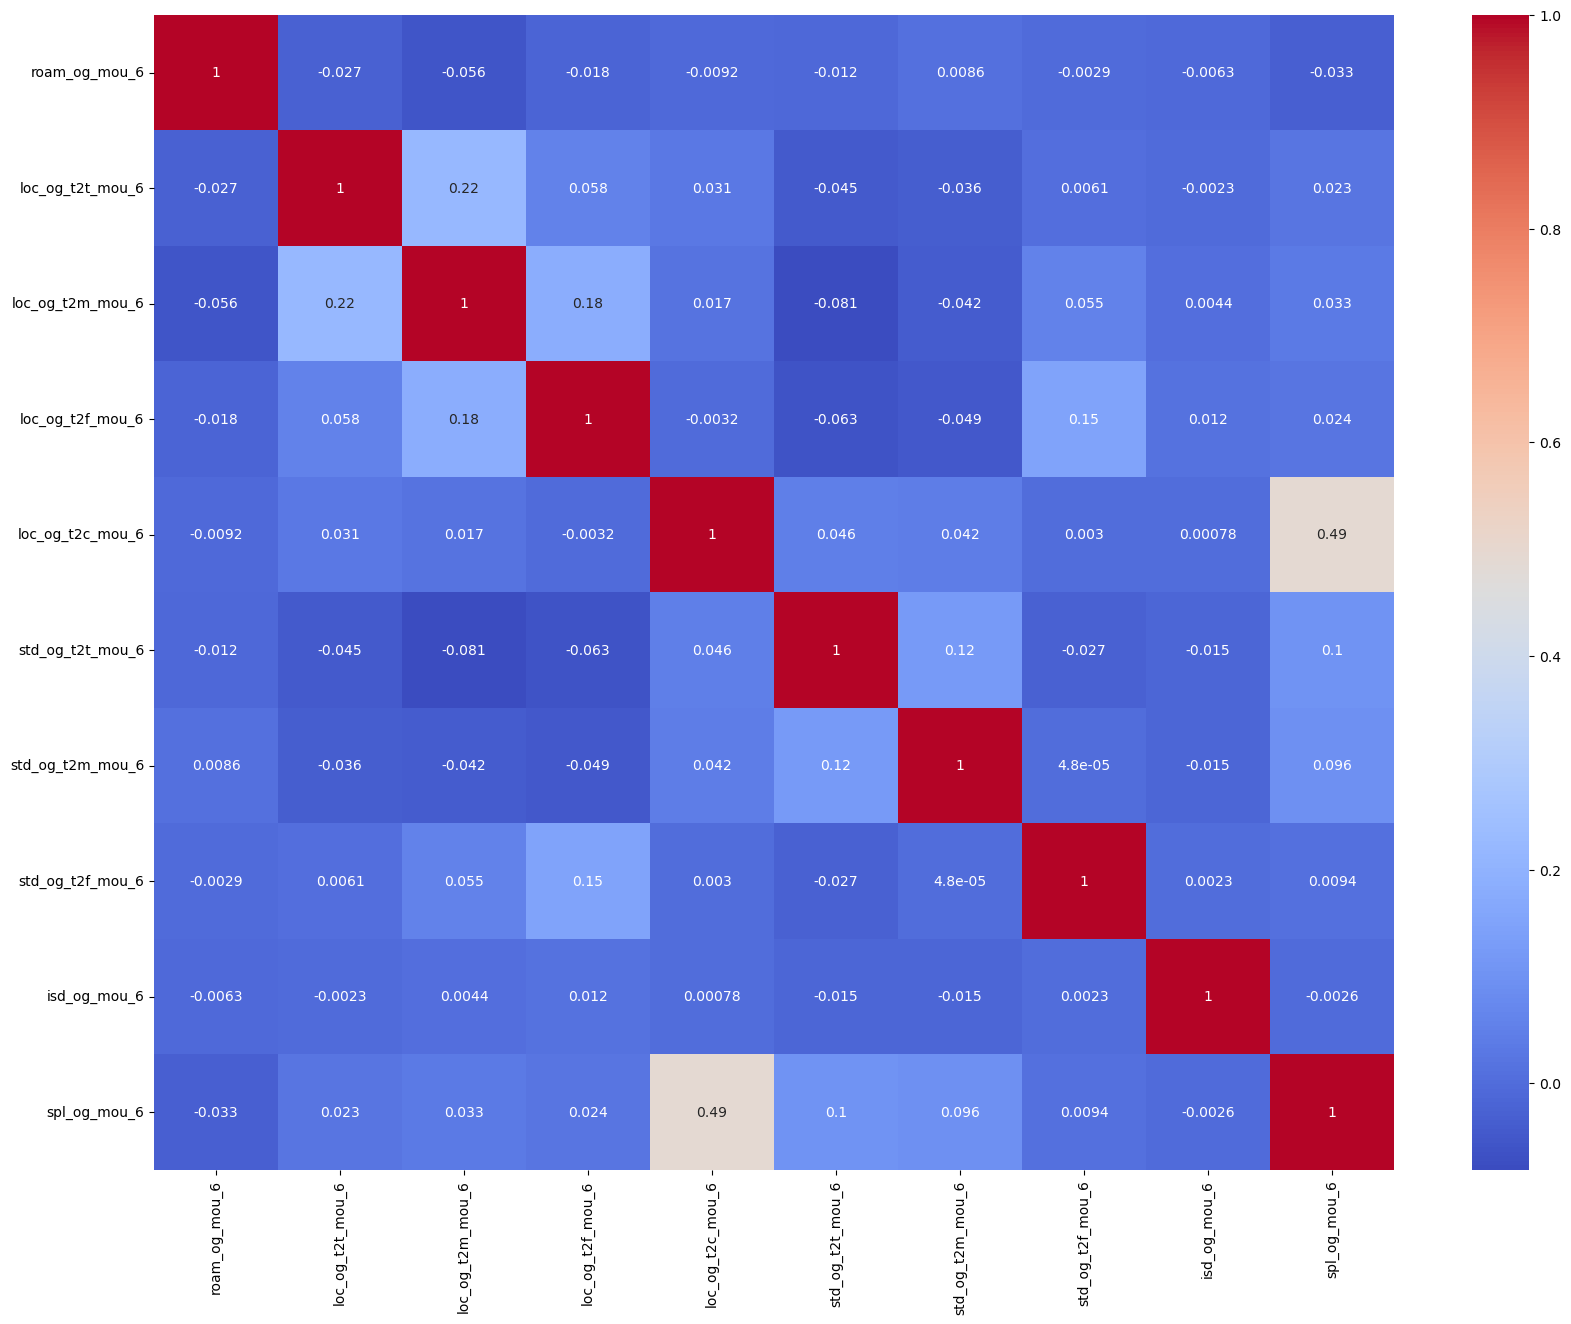

In [50]:
heatmap(20,15,df_high_val_cust.filter(mou_og))

#### Check the incoming mou variables 

In [51]:
mou_ic= df_high_val_cust.columns[df_high_val_cust.columns.str.contains('.*_ic_.*mou_6',regex=True)]

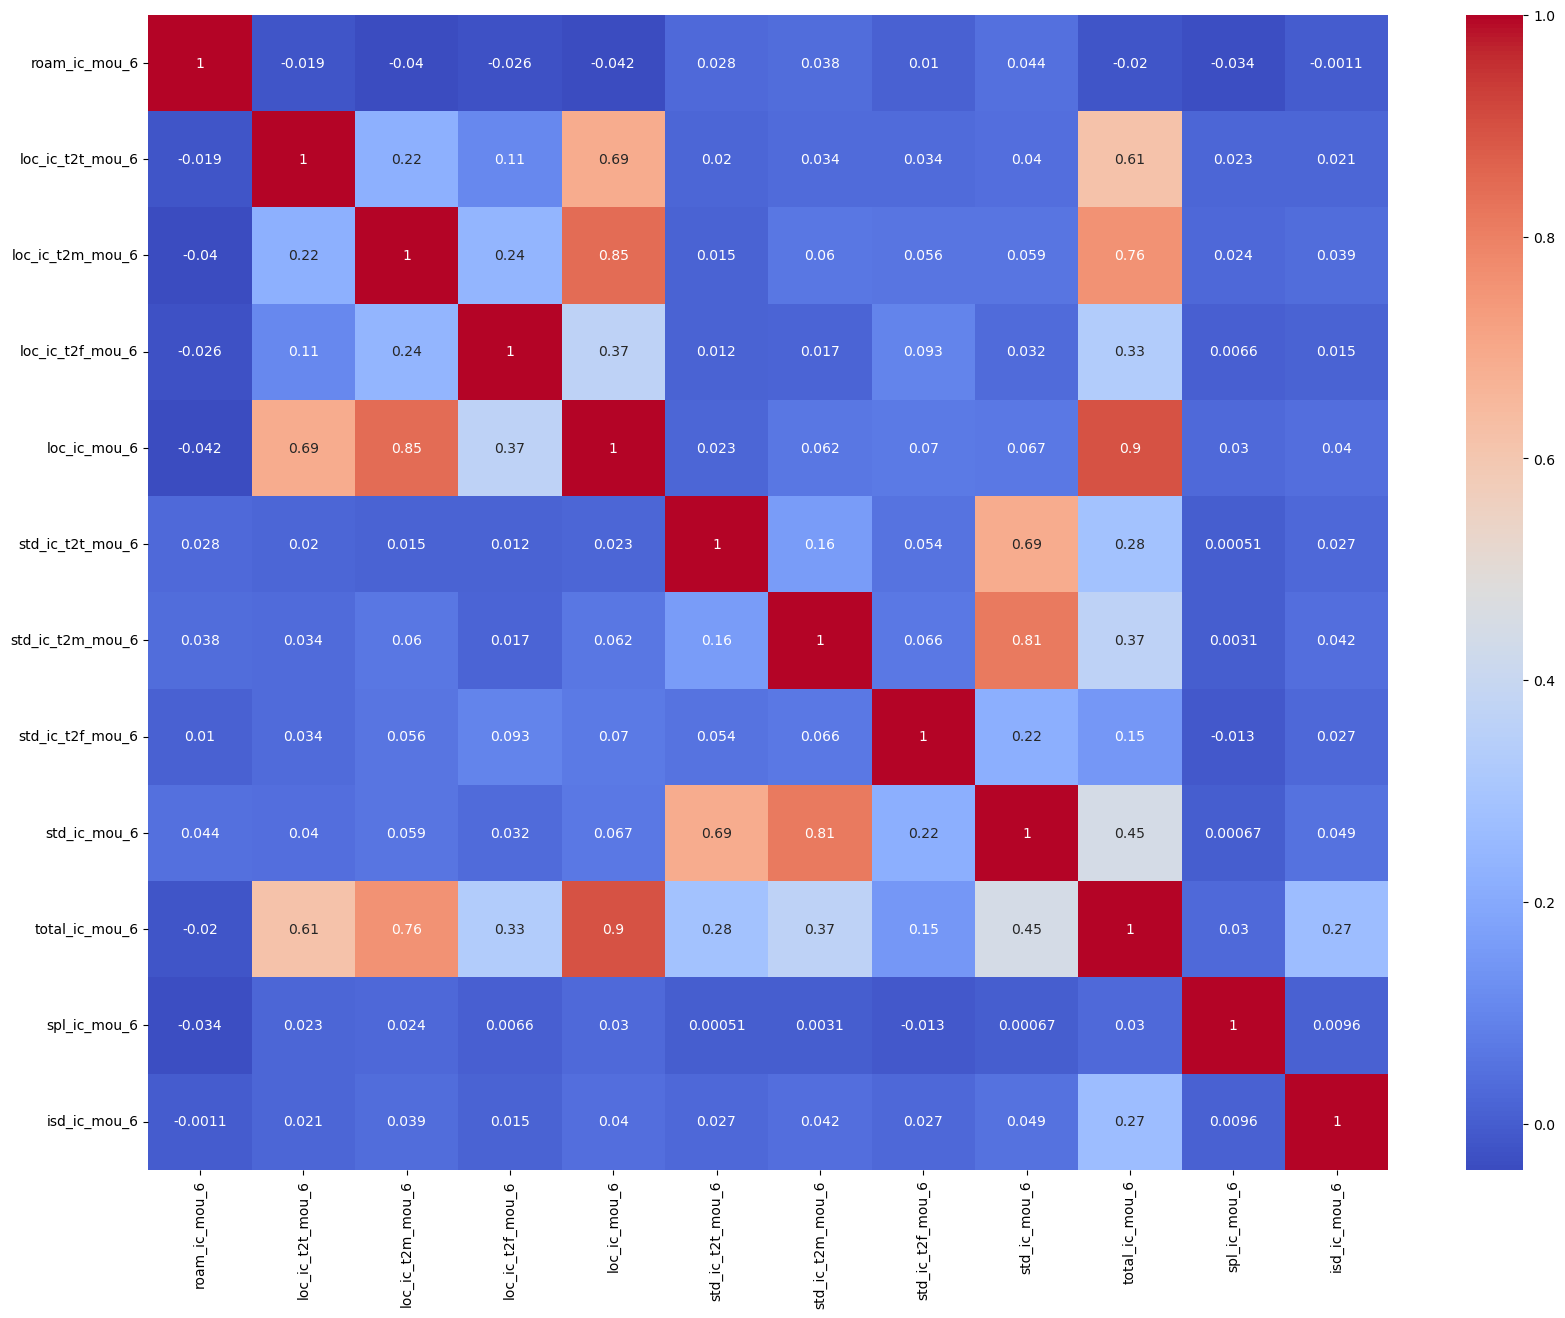

In [52]:
heatmap(20,15,df_high_val_cust.filter(mou_ic))

In [53]:
#Drop the highly corelated attributes
list_total_ic= df_high_val_cust.columns[df_high_val_cust.columns.str.contains('total_ic_mou|std_ic_mou|loc_ic_mou',regex=True)]
df_high_val_cust.drop(list_total_ic,axis=1,inplace=True)

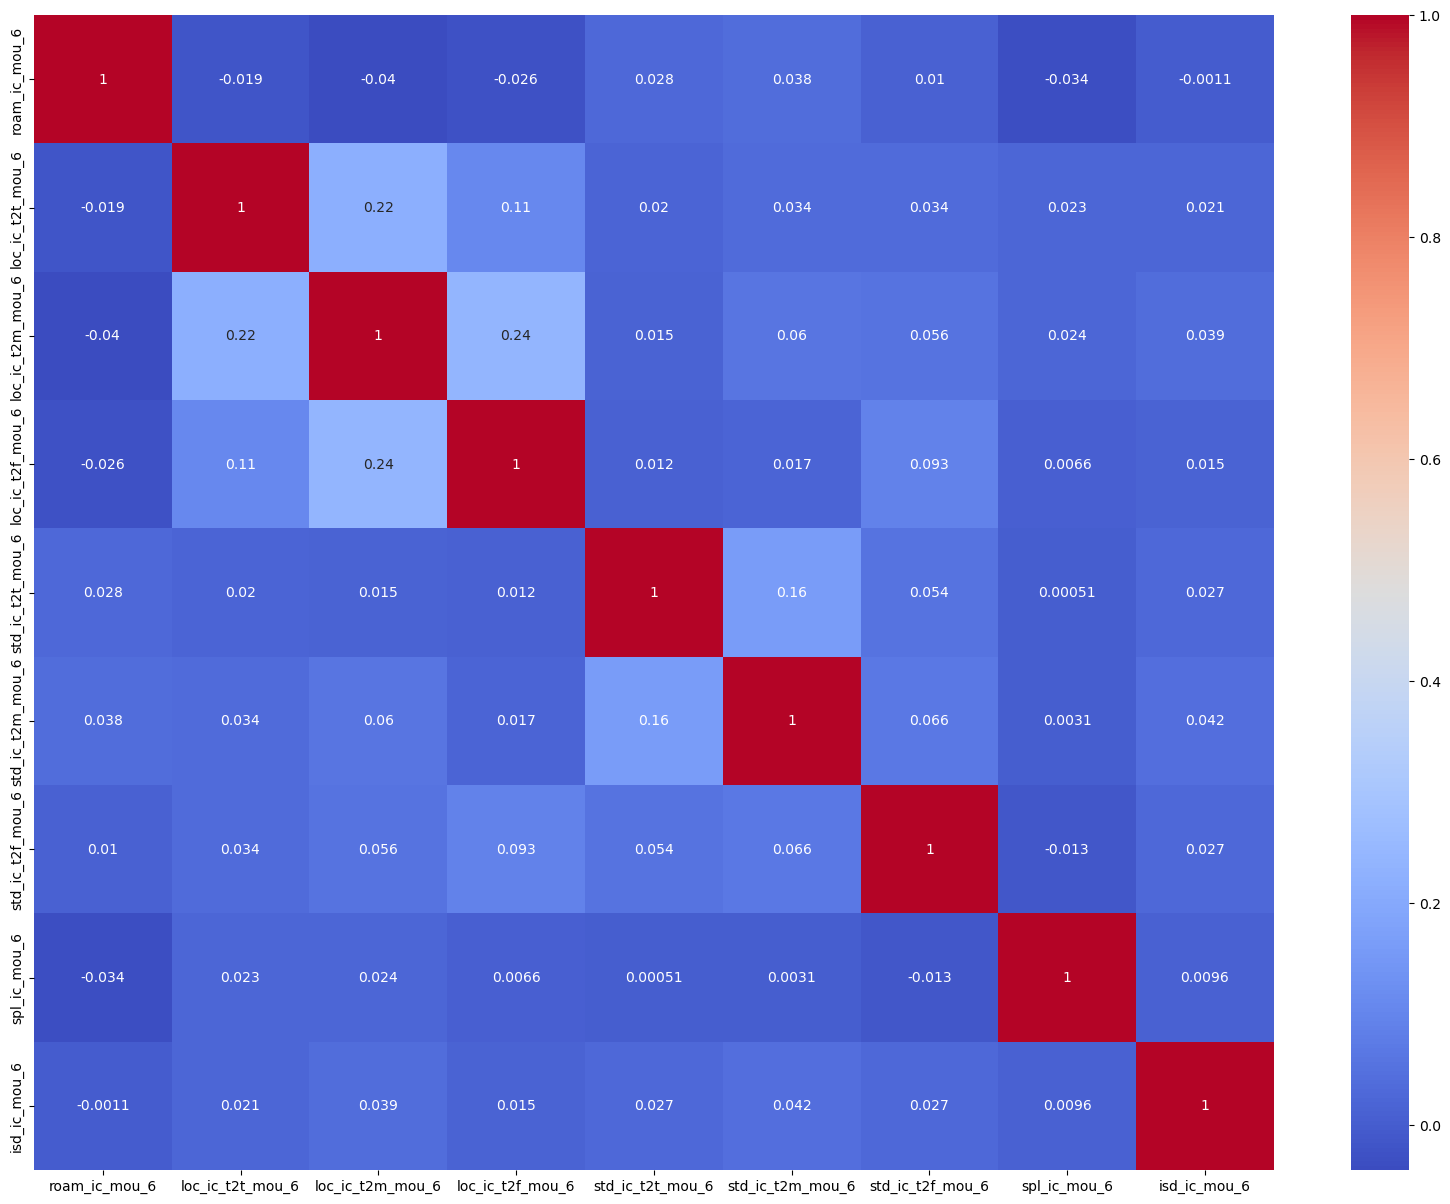

In [54]:
heatmap(20,15,df_high_val_cust.filter(mou_ic))

#### 4. Tenure Analysis for Customers

In [55]:
tenure= df_high_val_cust.copy()
tenure['tenure'] = tenure['aon']/30

In [56]:
tn_range= [0, 6, 12, 24, 60, 61]
tn_label = [ '0-6 Months', '6-12 Months', '1-2 Yrs', '2-5 Yrs', '5 Yrs and above']
tenure['tenure_range'] = pd.cut(tenure['tenure'], tn_range, labels=tn_label)
tenure['tenure_range'].head()

0         2-5 Yrs
7         2-5 Yrs
8     6-12 Months
21        1-2 Yrs
23        1-2 Yrs
Name: tenure_range, dtype: category
Categories (5, object): ['0-6 Months' < '6-12 Months' < '1-2 Yrs' < '2-5 Yrs' < '5 Yrs and above']

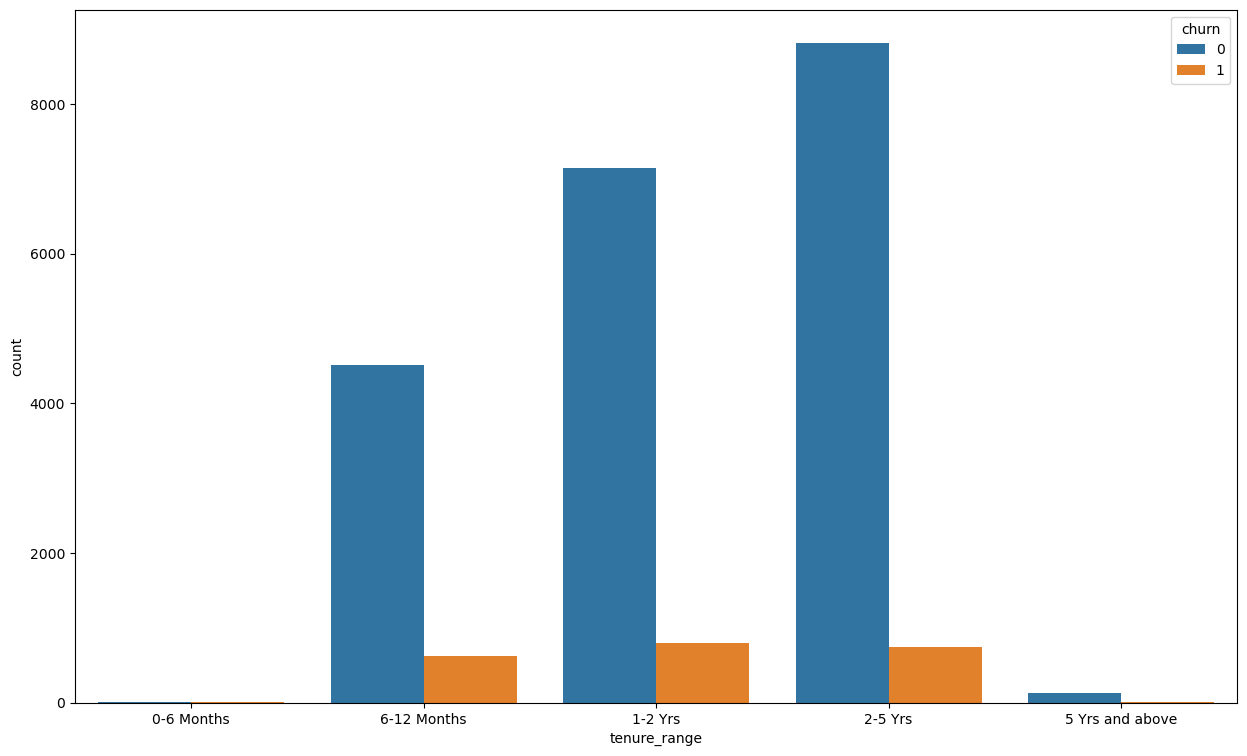

In [57]:
plt.figure(figsize=(15,9))
sns.countplot(x = 'tenure_range', hue = 'churn',data = tenure)
plt.show()

### Check columns which has more than 30% NA values 

In [58]:
#Drop Columns with > 30% of missing values and not for 9th Month
columns = df_high_val_cust.columns
perc_missing = df_high_val_cust.isnull().sum() * 100 / len(df_high_val_cust)
miss_value_df = pd.DataFrame({'column_name': columns,
                                 'perc_missing': perc_missing})

drop_column = miss_value_df.loc[(miss_value_df["perc_missing"] > 30.0)]["column_name"]
drop_column

date_of_last_rech_data_6    date_of_last_rech_data_6
date_of_last_rech_data_7    date_of_last_rech_data_7
date_of_last_rech_data_8    date_of_last_rech_data_8
count_rech_2g_6                      count_rech_2g_6
count_rech_2g_7                      count_rech_2g_7
count_rech_2g_8                      count_rech_2g_8
count_rech_3g_6                      count_rech_3g_6
count_rech_3g_7                      count_rech_3g_7
count_rech_3g_8                      count_rech_3g_8
arpu_3g_6                                  arpu_3g_6
arpu_3g_7                                  arpu_3g_7
arpu_3g_8                                  arpu_3g_8
arpu_2g_6                                  arpu_2g_6
arpu_2g_7                                  arpu_2g_7
arpu_2g_8                                  arpu_2g_8
night_pck_user_6                    night_pck_user_6
night_pck_user_7                    night_pck_user_7
night_pck_user_8                    night_pck_user_8
fb_user_6                                  fb_

In [59]:
df_high_val_cust.drop(drop_column, axis=1, inplace=True)
df_high_val_cust.shape

(29953, 125)

In [60]:
# Check the missing values percentages

df_null_check = 100*df_high_val_cust.loc[:].isnull().sum()/len(df_high_val_cust)
df_new = pd.DataFrame(df_null_check)
df_new.rename(columns={0:'Null_Percentage'}, inplace=True)
df_new.loc[df_new['Null_Percentage']!=0]

,Null_Percentage
og_others_6,1.809502
og_others_7,1.789470
og_others_8,3.912797
ic_others_6,1.809502
ic_others_7,1.789470
ic_others_8,3.912797
date_of_last_rech_6,0.243715
date_of_last_rech_7,0.327179
date_of_last_rech_8,1.943044


#### We can replace all the NaN values with zero for all numeric data as most of the data is clean and it will not impact the analysis.

In [61]:
num_col = ['og_others_8', 'ic_others_8', 'og_others_6','ic_others_6', 'og_others_7', 'ic_others_7','date_of_last_rech_6','date_of_last_rech_7','date_of_last_rech_8']

In [62]:
for i in num_col:
    df_high_val_cust.loc[df_high_val_cust[i].isnull(),i]=0

#### Create a new feature by combining columns from month 6 and 7 to form a new feature representing the good phase.

In [63]:
df_final = df_high_val_cust.copy()
print(df_final.shape)
df_final.head(5)

(29953, 125)


,mobile_number,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,...,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,total_rech_amt_data_6,total_rech_amt_data_7,total_rech_amt_data_8,total_avg_rech_amnt_6_7_GPhase,churn
0,7000842753,197.385,214.816,213.803,0.00,0.00,0.00,0.00,0.00,0.00,...,968,30.40,0.00,101.20,3.58,252.0,252.0,252.0,559.0,1
7,7000701601,1069.180,1349.850,3171.480,57.84,54.68,52.29,453.43,567.16,325.91,...,802,57.74,19.38,18.74,0.00,0.0,0.0,0.0,1185.0,1
8,7001524846,378.721,492.223,137.362,413.69,351.03,35.08,94.66,80.63,136.48,...,315,21.03,910.65,122.16,0.00,0.0,354.0,207.0,696.0,0
21,7002124215,514.453,597.753,637.760,102.41,132.11,85.14,757.93,896.68,983.39,...,720,0.00,0.00,0.00,0.00,0.0,0.0,0.0,640.0,0
23,7000887461,74.350,193.897,366.966,48.96,50.66,33.58,85.41,89.36,205.89,...,604,40.45,51.86,0.00,0.00,0.0,712.0,540.0,583.0,0


In [64]:
df_final.drop(["total_avg_rech_amnt_6_7_GPhase"],axis=1,inplace=True)
df_final.drop(df_high_val_cust.filter(regex='date_').columns,axis=1,inplace=True)
print (df_final.shape)

col_list = df_final.filter(regex='_6|_7').columns.str[:-2]
for idx, col in enumerate(col_list.unique()):
    print(col)
    avg_col_name = "avg_"+col+"_av67"
    col_6 = col+"_6"
    col_7 = col+"_7"
    df_final[avg_col_name] = (df_final[col_6]  + df_final[col_7])/ 2

(29953, 121)
arpu
onnet_mou
offnet_mou
roam_ic_mou
roam_og_mou
loc_og_t2t_mou
loc_og_t2m_mou
loc_og_t2f_mou
loc_og_t2c_mou
std_og_t2t_mou
std_og_t2m_mou
std_og_t2f_mou
isd_og_mou
spl_og_mou
og_others
loc_ic_t2t_mou
loc_ic_t2m_mou
loc_ic_t2f_mou
std_ic_t2t_mou
std_ic_t2m_mou
std_ic_t2f_mou
spl_ic_mou
isd_ic_mou
ic_others
total_rech_num
total_rech_amt
max_rech_amt
last_day_rch_amt
total_rech_data
max_rech_data
av_rech_amt_data
vol_2g_mb
vol_3g_mb
monthly_2g
sachet_2g
monthly_3g
sachet_3g
total_rech_amt_data


In [65]:
column_list_to_drop = df_final.filter(regex='_6|_7')
df_final.drop(column_list_to_drop,axis=1,inplace=True)
print (df_final.shape)

(29953, 83)


In [66]:
df_final.head(5)

,mobile_number,arpu_8,onnet_mou_8,offnet_mou_8,roam_ic_mou_8,roam_og_mou_8,loc_og_t2t_mou_8,loc_og_t2m_mou_8,loc_og_t2f_mou_8,loc_og_t2c_mou_8,...,avg_total_rech_data_av67,avg_max_rech_data_av67,avg_av_rech_amt_data_av67,avg_vol_2g_mb_av67,avg_vol_3g_mb_av67,avg_monthly_2g_av67,avg_sachet_2g_av67,avg_monthly_3g_av67,avg_sachet_3g_av67,avg_total_rech_amt_data_av67
0,7000842753,213.803,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,1.0,252.0,252.0,15.725,117.165,0.0,0.0,1.0,0.0,252.0
7,7000701601,3171.480,52.29,325.91,31.64,38.06,40.28,162.28,53.23,0.00,...,0.0,0.0,0.0,0.000,0.000,0.0,0.0,0.0,0.0,0.0
8,7001524846,137.362,35.08,136.48,0.00,0.00,12.49,50.54,0.00,7.15,...,1.0,77.0,88.5,178.000,375.475,0.5,0.5,0.0,0.0,177.0
21,7002124215,637.760,85.14,983.39,0.00,0.00,23.34,104.81,1.58,0.00,...,0.0,0.0,0.0,0.000,0.000,0.0,0.0,0.0,0.0,0.0
23,7000887461,366.966,33.58,205.89,0.00,0.00,33.58,148.56,0.00,17.71,...,1.0,89.5,178.0,0.240,299.545,0.0,0.0,1.0,0.0,356.0


##  Modelling

#### Split the Data into Training and Test Sets 

In [67]:
from sklearn.model_selection import train_test_split

#  Set the feature variables to X.
X = df_final.drop(['churn','mobile_number'],axis=1)

# Set the response variables to y.
y = df_final['churn']

y.head()

0     1
7     1
8     0
21    0
23    0
Name: churn, dtype: int64

In [68]:
scaler = StandardScaler()
X_col = X.columns
X_scaled = scaler.fit_transform(X)
X_scale_final = pd.DataFrame(X_scaled, columns=X_col)

In [69]:
def getTrainTestSplit():
    return train_test_split(X_scale_final,y, train_size=0.7,test_size=0.3,random_state=100)

In [70]:
# Split the data into train and test
X_train, X_test, y_train, y_test = getTrainTestSplit()

### PCA : Principal Component Analysis

- When computing the principal components, it is important to only use the training data and not the entire dataset. This is because we want to build a model that can perform well on new, unseen data. We will calculate the principal components using the training data and apply them to the test data later.

In [71]:
X_train.shape

(20967, 81)

In [72]:
pca = PCA(random_state=42)

In [73]:
pca.fit(X_train)

PCA(random_state=42)

#### Components from the PCA

In [74]:
pca.components_

array([[ 1.36146202e-02, -1.02688278e-01, -9.78458693e-02, ...,
         2.24253524e-01,  8.98463003e-02,  2.02710350e-01],
       [ 3.06226204e-01,  1.11137752e-01,  2.08220096e-01, ...,
         7.52752519e-02, -5.34397920e-02, -5.29469974e-02],
       [ 1.54487177e-01,  1.12975662e-01,  1.15993408e-01, ...,
        -3.11003403e-02,  1.66301206e-01,  2.08939762e-01],
       ...,
       [ 1.54270804e-03,  3.07392232e-01,  3.14328213e-01, ...,
         2.41672919e-04,  1.67468085e-05, -3.67824139e-05],
       [ 1.64467537e-16,  2.08133271e-15,  3.17920493e-15, ...,
        -5.77689043e-02, -9.58914162e-02, -2.51005166e-16],
       [-0.00000000e+00,  1.41359047e-14,  1.41051648e-14, ...,
         1.38251748e-01,  2.29486019e-01, -1.17267748e-16]])

In [75]:
pca.explained_variance_ratio_

array([1.03559838e-01, 9.55089083e-02, 6.35861149e-02, 4.62630567e-02,
       3.91373881e-02, 3.65774904e-02, 3.32217606e-02, 3.08775096e-02,
       2.92649254e-02, 2.76925388e-02, 2.69932786e-02, 2.47399900e-02,
       2.37060643e-02, 2.11333613e-02, 2.03513261e-02, 1.86179552e-02,
       1.76419601e-02, 1.67595105e-02, 1.58622445e-02, 1.52725168e-02,
       1.46651759e-02, 1.43137143e-02, 1.35993050e-02, 1.27916457e-02,
       1.18766558e-02, 1.13510983e-02, 1.11468054e-02, 1.06742586e-02,
       1.00600842e-02, 9.90182011e-03, 9.45442124e-03, 9.33933784e-03,
       9.16839612e-03, 9.04380332e-03, 8.71135526e-03, 8.43997795e-03,
       7.52124754e-03, 6.90424069e-03, 6.57915230e-03, 6.07470850e-03,
       5.43281499e-03, 5.35292043e-03, 4.43210551e-03, 4.34212966e-03,
       4.24292411e-03, 4.06049588e-03, 3.80408605e-03, 3.77412745e-03,
       3.54039555e-03, 3.33159199e-03, 3.31096670e-03, 3.21398405e-03,
       3.14352775e-03, 3.10550703e-03, 3.00193067e-03, 2.82903744e-03,
      

In [76]:
var_cum = np.cumsum(pca.explained_variance_ratio_)

#### Making a scree plot for the explained variance

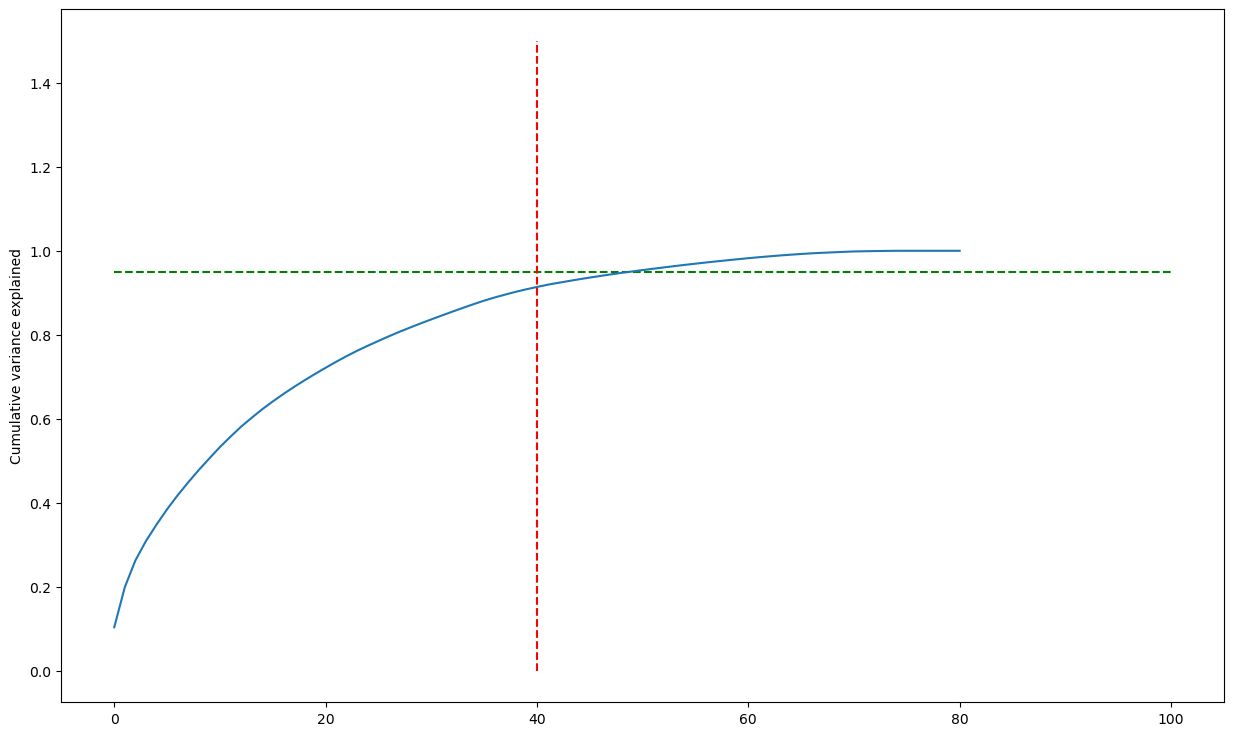

In [77]:
fig = plt.figure(figsize=[15,9])
plt.hlines(y=0.95, xmax=100, xmin=0, colors="green", linestyles="--")
plt.vlines(x=40, ymax=1.5, ymin=0, colors="red", linestyles="--")
plt.ylabel("Cumulative variance explained")
plt.plot(var_cum)
plt.show()

"45 components are chosen for modeling as they describe 95% of the variance in the dataset."

In [78]:
final_pca = IncrementalPCA(n_components=45)

In [79]:
df_train_pca = final_pca.fit_transform(X_train)

In [80]:
df_train_pca.shape

(20967, 45)

#### Applying the transformation on the test set

In [81]:
df_test_pca = final_pca.transform(X_test)
df_test_pca.shape

(8986, 45)

#### Applying logistic regression on the data from our Principal components

In [82]:
learn_pca = LogisticRegression()

In [83]:
model_pca = learn_pca.fit(df_train_pca, y_train)

In [84]:
pred_probs_test = model_pca.predict_proba(df_test_pca)

In [85]:
df_y_pred = model_pca.predict(df_test_pca)

In [86]:
# "We will import the classification report and confusion matrix functions from the sklearn.metrics module to evaluate the performance of our classification model."

from sklearn.metrics import classification_report,confusion_matrix, accuracy_score

print("\n-----------------------  Confusion Matrix --------------------- ")
print(confusion_matrix(y_test, df_y_pred))
print("\n-----------------------  Classification Report ---------------------")
print(classification_report(y_test, df_y_pred))
print("\n -----------------------  Accuracy Score ---------------------")
print(accuracy_score(y_test, df_y_pred))


-----------------------  Confusion Matrix --------------------- 
[[8213   92]
 [ 519  162]]

-----------------------  Classification Report ---------------------
              precision    recall  f1-score   support

           0       0.94      0.99      0.96      8305
           1       0.64      0.24      0.35       681

    accuracy                           0.93      8986
   macro avg       0.79      0.61      0.66      8986
weighted avg       0.92      0.93      0.92      8986


 -----------------------  Accuracy Score ---------------------
0.9320053416425551


# Random Forest

#### We will begin by fitting a random forest model with default hyperparameters.

In [87]:
X_train.shape

(20967, 81)

#### Default Hyperparameters
Let's first fit a random forest model with default hyperparameters.

In [88]:
# Import random forest classifier from sklearn library
from sklearn.ensemble import RandomForestClassifier

# Run the random forest with default parameters.
rfc = RandomForestClassifier()

In [89]:
# fit
rfc.fit(X_train,y_train)

RandomForestClassifier()

In [90]:
# Make predictions
predict = rfc.predict(X_test)

In [91]:
# Import classification report and confusion matrix from sklearn metrics
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score

In [92]:
# Let's check the report of our default model
print(classification_report(y_test,predict))

              precision    recall  f1-score   support

           0       0.96      0.99      0.97      8305
           1       0.76      0.44      0.56       681

    accuracy                           0.95      8986
   macro avg       0.86      0.72      0.77      8986
weighted avg       0.94      0.95      0.94      8986



#### Confusion  matrix

In [93]:
# Print the confusion matrix
print(confusion_matrix(y_test,predict))

[[8210   95]
 [ 380  301]]


In [94]:
print(accuracy_score(y_test,predict))

0.9471399955486312


### Paramater Tuning. 

Next, we will tune a few hyperparameters to see if we can improve the overall performance of the model.

In [95]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold



# Folds for k-fold CV
n_folds = 5

## Lets define a generic method to tune different parameters.
def tune_model_with_parameter(param) :
    rf = RandomForestClassifier()
    
    rf = GridSearchCV(rf, param, 
                    cv=n_folds, 
                   scoring="accuracy",
                  return_train_score=True)
    rf.fit(X_train, y_train)
    return rf

## We will also define a method to plot the graph of model after tuning
def plot_the_model_performance_after_tuning(modelParam, model, results):
    # plotting accuracies with given param
    plt.figure()
    plt.plot(results[modelParam], 
             results["mean_train_score"], 
             label="training accuracy")
    plt.plot(results[modelParam], 
             results["mean_test_score"], 
             label="test accuracy")
    plt.ylabel("Accuracy")
    plt.xlabel(modelParam)
    plt.legend()
    plt.show()

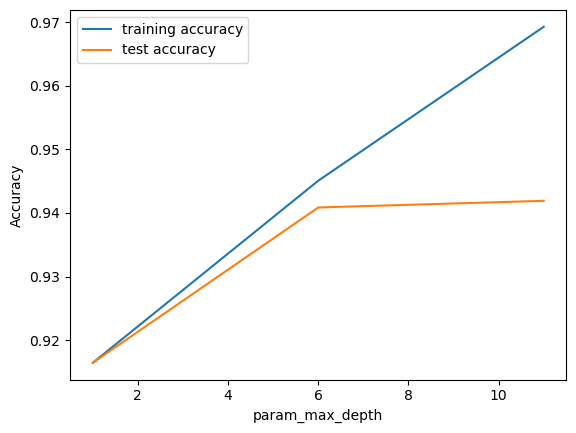

In [96]:
#let's try to tune max_depth first.

params = {'max_depth': range(1, 15, 5)}
rf = tune_model_with_parameter(params)
results = rf.cv_results_
plot_the_model_performance_after_tuning("param_max_depth", rf, results)

The plot shows that increasing the max_depth hyperparameter increases both the train and test scores until a point, after which the test score becomes stagnant. This indicates that increasing max_depth can lead to overfitting in the model. Therefore, it is important to control the depth of the trees to avoid overfitting. A max_depth value of 6 appears to have the best convergence and can be used for grid search.

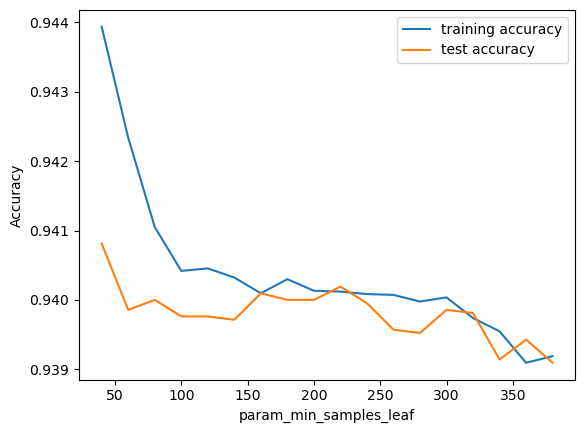

In [97]:
# To control depth of the tree, let's try to optimize the min_samples_leaf 

param = {'min_samples_leaf': range(40, 400, 20)}
rf = tune_model_with_parameter(param)
result = rf.cv_results_
plot_the_model_performance_after_tuning("param_min_samples_leaf", rf, result)

As we decrease the value of min_samples_leaf, the model starts to overfit, as evident from the increasing difference between train and test scores. A value of 100 seems to be a good range to start with, and we can fine-tune it further using grid search.

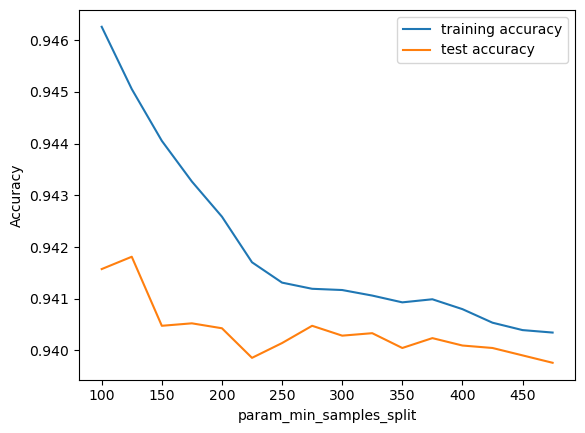

In [98]:
#Finally by tuning min_samples_split, let's try to optimize the minimum samples in each node 

param= {'min_samples_split': range(100, 500, 25)}
rf = tune_model_with_parameter(param)
result = rf.cv_results_
plot_the_model_performance_after_tuning("param_min_samples_split", rf, result)

Score almost remains the same with very low dip throught the range. We will use 1000 for grid view search.

In [99]:
# Based on the graphs from above we know appropriate params for the properties. 

from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

X_train, X_test, y_train, y_test = getTrainTestSplit()

final_model = RandomForestClassifier(bootstrap=True,
                                  max_depth=6, 
                                  min_samples_split=150,
                                  min_samples_leaf=100,
                                  oob_score = True, n_jobs = -1,
                                  n_estimators=1000,
                                  max_features = 20,
                                  max_leaf_nodes = 30,   
                                  random_state =10
                                  )
final_model.fit(X_train, y_train)

# Making predictions
predict_test = final_model.predict(X_test)

In [100]:
# Import classification report and confusion matrix from sklearn metrics

from sklearn.metrics import classification_report,confusion_matrix, accuracy_score

print("\n-----------------------  Confusion Matrix --------------------- ")
print(confusion_matrix(y_test, df_y_pred))
print("\n-----------------------  Classification Report ---------------------")
print(classification_report(y_test, df_y_pred))
print("\n -----------------------  Accuracy Score ---------------------")
print(accuracy_score(y_test, df_y_pred))


-----------------------  Confusion Matrix --------------------- 
[[8213   92]
 [ 519  162]]

-----------------------  Classification Report ---------------------
              precision    recall  f1-score   support

           0       0.94      0.99      0.96      8305
           1       0.64      0.24      0.35       681

    accuracy                           0.93      8986
   macro avg       0.79      0.61      0.66      8986
weighted avg       0.92      0.93      0.92      8986


 -----------------------  Accuracy Score ---------------------
0.9320053416425551


<Axes: >

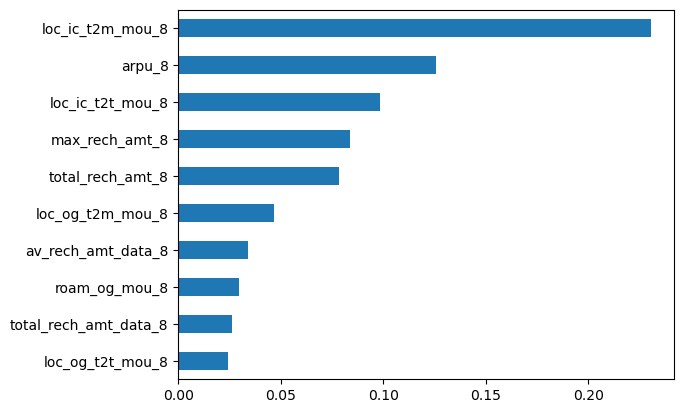

In [101]:
importnc= final_model.feature_importances_
wt = pd.Series(importnc,
                 index=X_train.columns.values)
wt.sort_values()[-10:].plot(kind = 'barh')

Important features ...


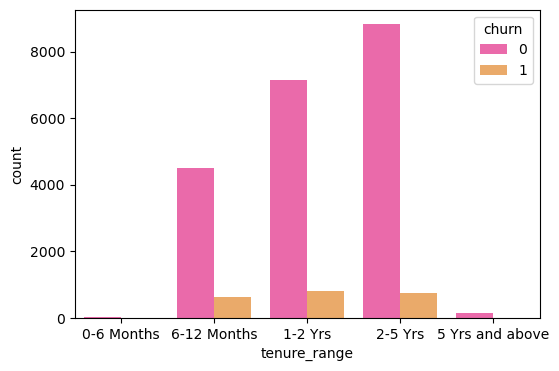

,PC1,PC2,PC3,Feature
0,0.013615,0.306226,0.154487,arpu_8
1,-0.102688,0.111138,0.112976,onnet_mou_8
2,-0.097846,0.208220,0.115993,offnet_mou_8
3,-0.006749,0.052390,0.001505,roam_ic_mou_8
4,-0.021590,0.062553,0.023639,roam_og_mou_8
5,-0.020451,0.089581,0.006271,loc_og_t2t_mou_8
6,-0.022742,0.167355,-0.034601,loc_og_t2m_mou_8
7,0.011691,0.100447,-0.094795,loc_og_t2f_mou_8
8,-0.016508,0.018951,0.084266,loc_og_t2c_mou_8
9,-0.104055,0.072047,0.124452,std_og_t2t_mou_8


In [106]:
print("Important features ...")
plt.figure(figsize=(6,4))
sns.countplot(x = 'tenure_range', hue = 'churn',data =tenure,palette=("spring"))
plt.show()


col = list(X_scale_final.columns)
df_pca = pd.DataFrame({'PC1':pca.components_[0],'PC2':pca.components_[1], 'PC3':pca.components_[2],'Feature':col})
df_pca.head(15)

### Business Insights

- The number of high-value customers churning is low, but the fact that no new high-value customers have been onboarded in the last six months is a cause for concern. The company should focus on this aspect.

- Customers with less than four years of tenure are more likely to churn. The company should concentrate on this segment by introducing new schemes for them.

- The average revenue per user (ARPU) is the most crucial feature in determining churn prediction.

- The incoming and outgoing calls on roaming for the eighth month are strong indicators of churn behavior.